<a href="https://colab.research.google.com/github/Etienne-DUPUIS/detecteur-ambiance/blob/main/simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train predictive model using Sensor data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


## Import & process data

In [38]:
df = pd.DataFrame()
import os
for root, dirs, files in os.walk("/content"):
    for filename in files:
      if "sensor_data" in filename:
        df = df.append(pd.read_csv(filename), ignore_index=True)

In [39]:
# Statistical study of input dataframe
df[list(df.axes[1][2:])].aggregate({min, max, "mean", "median", "std"})

,Humidity,Temperature,Motion,AmbianceLevel,AmbianceType
min,55.000000,11.000000,0.000000,15.000000,1.000000
mean,57.773995,19.345031,0.500015,49.002446,1.400298
max,61.000000,23.000000,1.000000,71.000000,3.000000
median,58.000000,22.000000,1.000000,47.000000,1.000000
std,1.045597,5.099088,0.500004,12.071265,0.521008


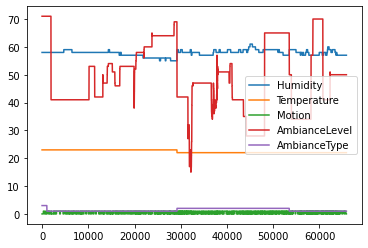

In [48]:
df[list(df.axes[1][2:])].plot()
plt.show()

In [47]:
# Fix temperature
last_temperature = df.Temperature.max()
for i,temperature in enumerate(df["Temperature"]):
  if temperature > 15:
    last_temperature = temperature
  else:
    df.Temperature[i] = last_temperature

## Define & train model

### Linear regression

coefficient of determination: 0.9987117354330204


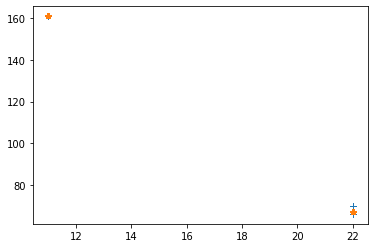

In [ ]:
from sklearn.linear_model import LinearRegression

# linear regression
y = df['Humidity'].to_numpy().reshape((-1,1))
x = df['Temperature'].to_numpy().reshape((-1,1))

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

plt.plot(x, y, '+', label="real Humidity")
plt.plot(x, model.predict(x), '*', label="predicted Humidity")
plt.show()